<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Machine Learning with Linear Regression

#### Michael J. Pyrcz, Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)



Here's a simple workflow, demonstration of linear regression for subsurface modeling workflows. This should help you get started with building subsurface models that data analytics and machine learning. Here's some basic details about linear regression. 

* I have a lecture on [Linear Regression](https://youtu.be/0fzbyhWiP84) as part of my [Machine Learning](https://www.youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf) course. Note, all recorded lectures, interactive and well-documented workflow demononstrations are available on my GitHub repository [GeostatsGuy's Python Numerical Demos](https://github.com/GeostatsGuy/PythonNumericalDemos). 

#### Linear Regression

Linear regression for prediction.  Here are some key aspects of linear regression:

**Parametric Model**

* the fit model is a simple weighted linear additive model based on all the available features, $x_1,\ldots,x_m$.

* the general form of the multilinear regression model takes the form of $y = \sum_{\alpha = 1}^m b_{\alpha} X_{\alpha} + b_0$

* the specific form of the linear regression model takes the form $y = b_1 x + b_0$

**Least Squares**

* least squares optimization is applied to select the model parameters, $b_1,\ldots,b_m,b_0$ 

* we minize the error over the trainind data $\sum_{i=1}^n (y_i - (\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0))^2$

* this could be simplified as the sum of square error over the training data, $\sum_{i=1}^n (\Delta y_i)^2$

**Assumptions**

* **Error-free** - predictor variables are error free, not random variables 
* **Linearity** - response is linear combination of feature(s)
* **Constant Variance** - error in response is constant over predictor(s) value
* **Independence of Error** - error in response are uncorrelated with each other
* **No multicollinearity** - none of the features are redundant with other features 

#### Other Resources

This is a tutorial / demonstration of **Linear Regression**.  In $Python$, the $SciPy$ package, specifically the $Stats$ functions (https://docs.scipy.org/doc/scipy/reference/stats.html) provide excellent tools for efficient use of statistics.  
I have previously provided this example in R and posted it on GitHub:

* [Linear Regression in R](https://github.com/GeostatsGuy/geostatsr/blob/master/linear_regression_demo_v2.R)
* [Linear Regression in R markdown](https://github.com/GeostatsGuy/geostatsr/blob/master/linear_regression_demo_v2.Rmd) with docs 
* [Linear Regression in R document](https://github.com/GeostatsGuy/geostatsr/blob/master/linear_regression_demo_v2.html) knit as an HTML document

and also in Excel:

* [Linear Regression in Excel](https://github.com/GeostatsGuy/ExcelNumericalDemos/blob/master/Linear_Regression_Demo_v2.xlsx)

#### Workflow Goals

Learn the basics of time series analysis in Python to for analysis, modeling and prediction with production data. This includes:

* Basic Python workflows and data preparation

* Training linear regression model parameters to training data

* Model visualizaton and checking  

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You may want to copy the data file to your working directory. They are available here:

* Tabular data - [Density_Por_data.csv](https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/Density_Por_data.csv).

or you can use the code below to load the data directly from my GitHub [GeoDataSets](https://github.com/GeostatsGuy/GeoDataSets) repository.

#### Import Required Packages

Let's import the GeostatsPy package.

In [1]:
supress_warnings = False
import os                                                   # to set current working directory 
import numpy as np                                          # arrays and matrix math
import scipy.stats as st                                    # statistical methods
import pandas as pd                                         # DataFrames
import matplotlib.pyplot as plt                             # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
cmap = plt.cm.inferno                                       # default color bar, no bias and friendly for color vision defeciency
plt.rc('axes', axisbelow=True)                              # grid behind plotting elements
if supress_warnings == True:
    import warnings                                         # supress any warnings for this demonstration
    warnings.filterwarnings('ignore')  

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs. 

#### Declare functions

Let's define a couple of functions to streamline plotting correlation matrices and visualization of a decision tree regression model. 

In [2]:
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see below) data file in this working directory.  

In [3]:
#os.chdir("C:\PGE337")                                       # set the working directory

#### Loading Data

Let's load the provided dataset. 'Density_Por_data.csv' is available at https://github.com/GeostatsGuy/GeoDataSets. It is a comma delimited file with 20 density measures ($\frac{g}{cm^3}$) and porosity measures from 2 rock units from the subsurface, porosity (as a fraction). We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it by printing a slice and by utilizing the 'head' DataFrame member function (with a nice and clean format, see below).


In [4]:
#df = pd.read_csv("Density_Por_data.csv")                    # read a .csv file in as a DataFrame
df = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/Density_Por_data.csv") # load data from Dr. Pyrcz's GitHub repository
df.head()                                                   # we could also use this command for a table preview 

,Density,Porosity
0,1.281391,16.610982
1,1.404932,13.668073
2,2.346926,9.590092
3,1.348847,15.877907
4,2.331653,4.968240


It is useful to review the summary statistics of our loaded DataFrame.  That can be accomplished with the 'describe' DataFrame member function.  We transpose to switch the axes for ease of visualization.

In [5]:
df.describe().transpose()                                   # summary statistics

,count,mean,std,min,25%,50%,75%,max
Density,105.0,1.737917,0.288278,0.996736,1.552713,1.748788,1.906634,2.410560
Porosity,105.0,12.531279,3.132269,4.966421,10.546483,12.411608,14.230930,20.964941


Here we extract:

* the predictor feature, Density
* response feature, Porosity 

from the DataFrame into separate ndarrays called 'X' and 'y' respectively for convenience.

In [6]:
xname = 'Density'; xlabel = 'Density'; xunit = '$g/cm^3$'
yname = 'Porosity'; ylabel = 'Porosity'; yunit = '$\%$'
xmin = 1.0; xmax = 2.4; ymin = 4.0; ymax = 22.0
y = df[yname].values                                        # extract features are 1D ndarrays
x = df[xname].values

#### Liner Regression Model

Let's first calculate the linear regression model with SciPy package, stats module.

* recall we imported the module as 'st' above

````python
import scipy.stats as st                                    # statistical methods
````

We instantiate and fit the model all in one line of code!

In [7]:
slope, intercept, r_value, p_value, std_err = st.linregress(x,y) # instantiate and fit a linear regression model

print('The model parameters are, slope (b1) = ' + str(round(slope,2)) + ', and the intercept (b0) = ' + str(round(intercept,2)))

The model parameters are, slope (b1) = -9.1, and the intercept (b0) = 28.35


Note that we have 5 outputs when we instantiate and fit our model.

* **slope** - the slope of our linear model, the $b_1$ in the model, $y = b_1 x + b_0$
* **intercept** - the intercept of our linear model, the $b_0$ in the model, $y = b_1 x + b_0$
* **r_value** - the Pearson correlation, the square is the $r^2$, the variance explained
* **p_value** - the p-value for the hypothesis test for the slope of the model of zero
* **stderr** - the standard error of the slope parameter, $SE_{b_1}$

Let's plot the data and the model, to get out estimates we substitute our predictor feature values into our model.

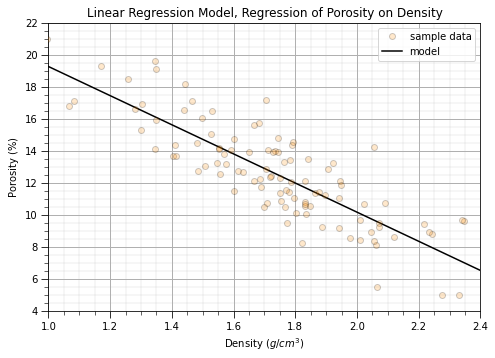

In [8]:
x_values = np.linspace(xmin,xmax,100)                       # return an array of density values 
y_model = slope * x_values + intercept                      # apply our linear regression model to estimate at the training data values

plt.subplot(111)                                            # plot the model
plt.plot(x, y, 'o', label='sample data', color = 'darkorange', alpha = 0.2, markeredgecolor = 'black',zorder=10)
plt.plot(x_values, y_model, label='model', color = 'black',zorder=1)
plt.title('Linear Regression Model, Regression of ' + yname + ' on ' + xname)
plt.xlabel(xname + ' (' + xunit + ')')
plt.ylabel(yname + ' (' + yunit + ')')
plt.legend(); add_grid(); plt.xlim([xmin,xmax]); plt.ylim([ymin,ymax])
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

The model looks reasonable. Let's go beyond occular inspection.

#### Model Checking

Let's test the slope with the following hypothesis test:

\begin{equation}
H_0: b_{1} = 0.0
\end{equation}

\begin{equation}
H_1: b_{1} \ne 0.0
\end{equation}

and see if we can reject this hypothesis, $H_{0}$ , that the slope parameter is equal to 0.0.  If we reject this null hypothesis, we show that the slope is meaning full and there is a linear relationship between density and porosity that we can use.

Fortunately, the $linregress$ function from the $stats$ package provides us with the two sided p-value for this test.  

In [9]:
print('Two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero = ' + str(p_value) + '.')      

Two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero = 7.744611355360021e-29.


For the demo case we reject the null hypothesis and adopt the alternative hypothesis, $H_1$, that the slope is not equal to 0.0.

We can also observe correlation coefficient, $r$ value, and the $r^2$ value that indicates the proportion of variance that is described for our model. 

In [10]:
print('The correlation coefficient is = ' + str(round(r_value,2)) + ' and the r-squared value = ', str(round(r_value**2,2)))

The correlation coefficient is = -0.84 and the r-squared value =  0.7


#### Confidence Intervals

Let's calculate the 95% confidence interval for the slope parameter, $b_1$ of our model.

We first need the $t_{critical}$ value, given $\alpha$ and $df = n-2$.

In [11]:
alpha = 0.05
t_critical = st.t.ppf([alpha/2,1-alpha/2], df=len(x)-2)
print('The t critical lower and upper values are ' + str(np.round(t_critical,2)))
print('and the t statistic is ' + str(round(slope/std_err,2)))

The t critical lower and upper values are [-1.98  1.98]
and the t statistic is -15.58


We see a consistent result with the previousl hypothesis, since the t statistic is outside the t critical lower and upper interval, we reject the null hypothesis, $h_0$, that the slope, $b_1$ is equal to 0.0.

Next let's calculate the confidence interval of the slope.  We just need our t critical and the standard error in the slope.

In [12]:
print('The slope confidence interval is ' + str(round(slope,2)) + ' +/- ' + str(round(t_critical[1] * std_err,2)))
CI_slope = slope + t_critical*std_err
print('The slope P02.5 and P97.5 are ' + str(np.round(CI_slope,2)))

The slope confidence interval is -9.1 +/- 1.16
The slope P02.5 and P97.5 are [-10.26  -7.94]


#### Prediction

Let's use this model to make a prediction at all the data locations.  

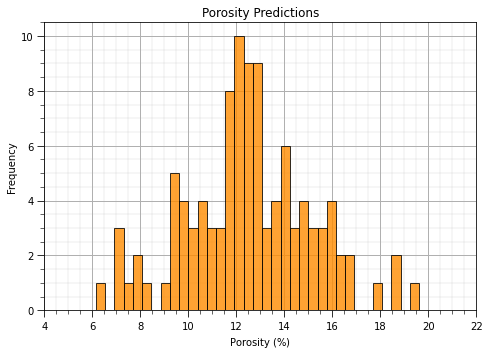

In [13]:
y_hat = slope * x + intercept
plt.subplot(111)
plt.hist(y_hat, color = 'darkorange', alpha = 0.8, edgecolor = 'black', bins = np.linspace(5,20,40))
plt.xlabel(yname + ' (' + yunit + ')'); plt.ylabel('Frequency'); plt.title(yname + ' Predictions'); plt.xlim([ymin,ymax])
add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

It is useful to plot the predictions of porosity and porosity data vs. the density data. From this plot we can observe the linear limitation of our model and get a sense of the unexplained variance $\frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2} {n-1}$

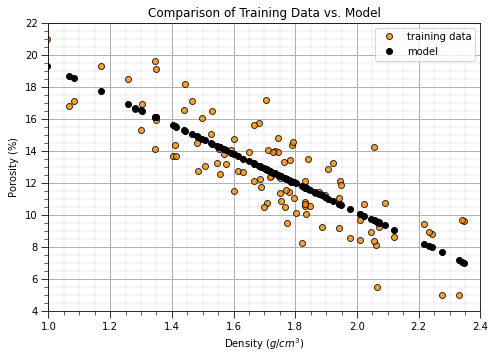

In [14]:
plt.subplot(111)
plt.plot(x, y, 'o', label='training data', color = 'darkorange', alpha = 0.8, markeredgecolor = 'black')
plt.plot(x, y_hat, 'o', label='model', color = 'black')
plt.title('Comparison of Training Data vs. Model')
plt.xlabel(xname + ' (' + xunit + ')')
plt.ylabel(yname + ' (' + yunit + ')')
plt.legend(); add_grid(); plt.xlim([xmin,xmax]); plt.ylim([ymin,ymax])
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

Next let's calculate the residual and check their distribution.  Residuals are the true values at the data locations minus the estimates at the data locations, $y_i - \hat{y}_i$.  We want to make sure the average is close to 0.0 and to observe the shape and spread of the residual distribution.

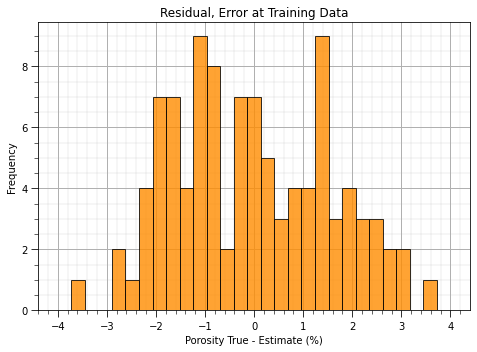

The average of the residuals is 0.0


In [15]:
residual = y - y_hat

plt.subplot(111)
plt.hist(residual, color = 'darkorange', alpha = 0.8, edgecolor = 'black', bins = np.linspace(-4,4,30))
plt.title("Residual, Error at Training Data"); plt.xlabel(yname + ' True - Estimate (%)');plt.ylabel('Frequency'); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

print('The average of the residuals is ' + str(round(np.mean(residual),2)))

Next we will check the cross validation plot, truth vs. estimated, and cross validation residual plot, residual vs. the fitted value.  

* With these plots we check if the errors are consistent over the range of fitted values. 

* For example, we could use this plot to identify higher error or systematic under- or overestimation over a specific range of fitted values.

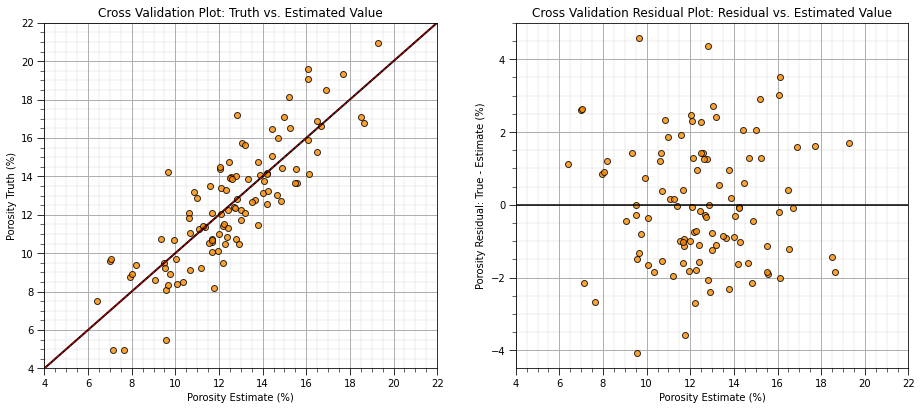

In [22]:
slope_cross, intercept_cross, _, _, _ = st.linregress(y_hat,y) # check for conditional bias with a linear fit to the cross validation plot

plt.subplot(121)
plt.plot(y_hat, y, 'o', color = 'darkorange', alpha = 0.8, markeredgecolor = 'black')
plt.plot([ymin,ymax], [ymin,ymax], 'black',lw=2.0)
plt.plot(np.linspace(ymin,ymax,100), slope_cross*np.linspace(ymin,ymax,100)+intercept_cross, 
         alpha = 0.8, color = 'red',ls='--',lw=1.0)
plt.title('Cross Validation Plot: Truth vs. Estimated Value')
plt.xlabel(yname + ' Estimate (%)'); plt.ylabel(yname + ' Truth (%)'); add_grid(); plt.xlim([ymin,ymax]); plt.ylim([ymin,ymax])

plt.subplot(122)
plt.plot(y_hat, residual, 'o', color = 'darkorange', alpha = 0.8, markeredgecolor = 'black')
plt.plot([ymin,ymax], [0,0], 'black')
plt.title('Cross Validation Residual Plot: Residual vs. Estimated Value')
plt.xlabel(yname + ' Estimate (%)'); plt.ylabel(yname + ' Residual: True - Estimate (%)'); add_grid()
plt.xlim([ymin,ymax])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2); plt.show()

For the demonstration case, there is no apparent conditional bias in the estimates over the range of values.

#### Comments

Linear regression is efficient with the stats module of the SciPy package in Python. With one line of code we can build a model and get the outputs needed to make predictions and check the model. I hope this was helpful,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
On twitter I'm the @GeostatsGuy.


***

#### More on Michael Pyrcz and the Texas Center for Geostatistics:

### Michael Pyrcz, Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
